<a href="https://colab.research.google.com/github/naoya1110/nitkc-ncku-ai-robotics/blob/main/Week03_sup_PyTorch_Simple_Linear_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a supplemental material for Week03 to explain how the model parameters are updated with stochastic gradient decent (SGD).

In this example, we are going to implement a simple linear regression model with PyTorch.

First of all, let's import packages of PyTorch, Numpy and Matplotlib.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

Here we create a dataset of $x$ (input) and $y$ (output) with a simple linear equation below. Note that output data $y$ contains some random noise. 

$y = 5x + 3 + \mathrm{noise}$

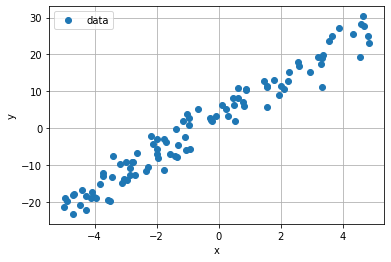

In [2]:
x = 10*np.random.rand(100)-5
noise = 3*np.random.randn(x.shape[0])
y = 5*x + 3 + noise
plt.plot(x, y, marker="o", lw= 0, label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

Our goal is to find a linear function model (equation) that can fit the x-y dataset well.

Instead of using PyTorch, we can simply use `np.polyfit()` to fit the dataset. Then we can obtain the fitting parameters of $w$ and $b$ of a linear function of $y = wx + b$, where $w$ and $b$ are called weight and bias, respectively.

In [3]:
w, b = np.polyfit(x, y, 1)
print(f"w={w:.3f}, b={b:.3f}")

w=4.926, b=3.251


Because the x-y dataset contains some noise, obtained $w$ and $b$ are not exactly same as we used for creating the dataset, but they are close enough. Anyway we can make a fitting line with the obtained parameters of $w$ and $b$.

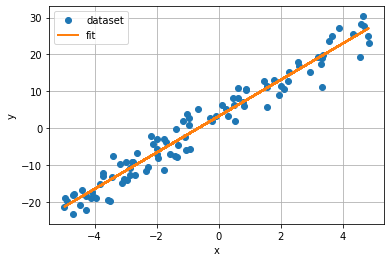

In [4]:
y_fit = w*x + b

plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, y_fit, lw=2, label="fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

So `np.polyfit()` works very well. But in this example we will do the same thing with PyTorch.

Now we convert the dataset of $x$ and $y$ into PyTorch Tensor.

In [5]:
x = torch.tensor(x)
y = torch.tensor(y)

print(type(x))
print(type(y))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


Then we define a function named `model()` that predicts an output value of $y$ from an input value of $x$ with the parameters of $w$ and $b$.

In [6]:
def model(x):
    return w*x + b

Also we define a function named `loss_func()` to calculate the mean squared error between $p$ and $y$, where $p$ is the output values, i.e. prediction, of the `model()`. This type of function is called loss function which can be used for measuring how wrong the model prediction was.

$\displaystyle \mathrm{loss} = \mathrm{mse}(p, y) = \frac{1}{N}\sum_{i=0}^{N-1}(p_i-y_i)^2$

In [7]:
def loss_func(p, y):
    return ((p-y)**2).mean()

At this point we don't know what $w$ and $b$ are. So we initialize those values with arbitary numbers.

In [8]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

Now we can make a prediction using `model()`

In [9]:
p = model(x)
print(p)

tensor([-7.3325, -0.3014, -7.8545, -7.1885, -6.0622, -6.1398, -4.2106, -6.7053,
        -9.6850, -3.0545, -9.9729, -6.3118, -9.1018, -0.1772, -1.6892, -9.6614,
        -5.6722, -6.3727, -1.6479, -7.6854, -0.1578, -9.4802, -8.0634, -1.4524,
        -2.8903, -7.8666, -8.7209, -5.2882, -6.7658, -8.9692, -2.7710, -0.3309,
        -1.6578, -6.9711, -9.2722, -0.4157, -6.0045, -3.4285, -2.4088, -8.7212,
        -6.7615, -2.7240, -7.2700, -1.6734, -6.5652, -9.0944, -8.8251, -1.1054,
        -4.1287, -6.9867, -0.6773, -5.9279, -8.5537, -9.9615, -4.4727, -4.3806,
        -5.9636, -2.0415, -4.3781, -6.9844, -4.5450, -3.5224, -3.2208, -5.9609,
        -4.5170, -9.0259, -4.8921, -8.4418, -1.8098, -2.9876, -6.4007, -1.3511,
        -7.9874, -8.1744, -8.1223, -5.0745, -4.7050, -9.8937, -7.7857, -9.4130,
        -5.2162, -8.4049, -4.7649, -9.2893, -7.9608, -2.4504, -7.1255, -7.6218,
        -6.9894, -7.7524, -5.2378, -9.7088, -0.4350, -3.4286, -6.3330, -4.1811,
        -3.4518, -4.1029, -6.0705, -8.50

Let's visualize current prediction. As we set arbitary number for $w$ and $b$, the model prediction does not fit the data well.

Text(0, 0.5, 'y')

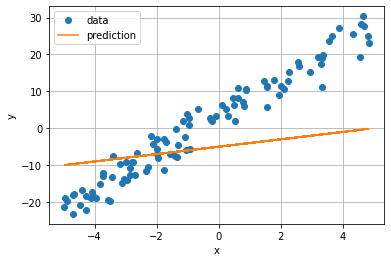

In [10]:
plt.plot(x, y, marker="o", lw=0, label="data")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Then we calculate loss (mean squared error) value by using `loss_func()`. Note that the loss value is very large because $w$ and $b$ are arbitaly values and not optimized yet.

In [11]:
loss = loss_func(p, y)
print(loss)

tensor(164.3660, dtype=torch.float64, grad_fn=<MeanBackward0>)


In order to optimize $w$ amd $b$, we need to know the gradients of loss respect to current $w$ and $b$ respectively. This can be done with `loss.backward()`. The gradients of $\frac{\partial \mathrm{loss}}{\partial w}$ and $\frac{\partial \mathrm{loss}}{\partial b}$ can be accessed by `w.grad` and `b.grad`, respectively.

In [12]:
loss.backward()
print(w.grad)
print(b.grad)

tensor(-55.0377)
tensor(-11.4936)


Then we can update $w$ and $b$ by using equations below where $\eta$ is learning rate. This is a method called stochastic gradient descent (SGD).

$\displaystyle w := w - \eta\frac{\partial \mathrm{loss}}{\partial w}$

$\displaystyle b := b - \eta\frac{\partial \mathrm{loss}}{\partial b}$


When we update those values we don't want to calculate the gradients. For this purpose `with torch.no_grad()` is stated at the beginning.

In [13]:
lr = 0.01    # define learning rate

with torch.no_grad():    # disable gradients calculations
    w -= w.grad*lr       # update w
    b -= b.grad*lr       # update b

At this point you can find the values of $w$ and $b$ are a bit closer to the true values ($w$=5.0, $b$=3.0) than the initial values.

In [14]:
print(w)
print(b)

tensor(1.5504, requires_grad=True)
tensor(-4.8851, requires_grad=True)


In order to optimize $w$ and $b$ further, we repeat above process many times.

In [15]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

lr = 0.01    # learning rate 
epochs = 50  # how many times we repeat training

w = torch.tensor(3.0, requires_grad=True)    # initialize w
b = torch.tensor(-1.0, requires_grad=True)   # initialize b

# empty lists for saving loss, w, b
loss_list = []
w_list = []
b_list = []

for epoch in range(epochs):

    p = model(x)              # prediction
    loss = loss_func(p, y)    # measure loss
    loss.backward()           # determine gradients

    with torch.no_grad():     # disable autograd
        w -= w.grad*lr        # update w 
        b -= b.grad*lr        # update b
        
        w.grad.zero_() # reset gradient
        b.grad.zero_() # reset gradient

    # save loss, w, b
    loss_list.append(loss.item())
    w_list.append(w.item())
    b_list.append(b.item())

    print(f"Epoch {epoch+1}, loss={loss.item():.3f}, w={w.item():.3f}, b={b.item():.3f}")

Epoch 1, loss=47.514, w=3.267, b=-0.940
Epoch 2, loss=40.580, w=3.491, b=-0.877
Epoch 3, loss=35.596, w=3.678, b=-0.813
Epoch 4, loss=31.969, w=3.834, b=-0.747
Epoch 5, loss=29.287, w=3.966, b=-0.681
Epoch 6, loss=27.266, w=4.076, b=-0.615
Epoch 7, loss=25.708, w=4.168, b=-0.548
Epoch 8, loss=24.476, w=4.246, b=-0.482
Epoch 9, loss=23.477, w=4.312, b=-0.416
Epoch 10, loss=22.643, w=4.368, b=-0.351
Epoch 11, loss=21.930, w=4.415, b=-0.286
Epoch 12, loss=21.304, w=4.455, b=-0.221
Epoch 13, loss=20.745, w=4.489, b=-0.158
Epoch 14, loss=20.236, w=4.519, b=-0.095
Epoch 15, loss=19.767, w=4.544, b=-0.034
Epoch 16, loss=19.329, w=4.566, b=0.027
Epoch 17, loss=18.917, w=4.585, b=0.087
Epoch 18, loss=18.528, w=4.601, b=0.146
Epoch 19, loss=18.158, w=4.616, b=0.204
Epoch 20, loss=17.805, w=4.629, b=0.261
Epoch 21, loss=17.467, w=4.640, b=0.317
Epoch 22, loss=17.144, w=4.650, b=0.372
Epoch 23, loss=16.833, w=4.660, b=0.426
Epoch 24, loss=16.535, w=4.668, b=0.479
Epoch 25, loss=16.249, w=4.676, b=

Now you see $w$ is close to 5.0 and $b$ is close to 3.0.

Let's visualize how the loss value decreased.

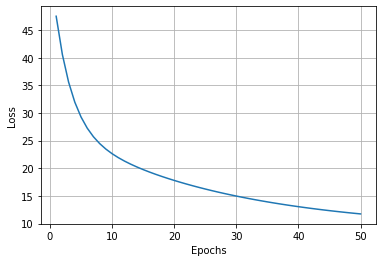

In [16]:
plt.plot(np.arange(epochs)+1, loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

Let's visualize how the `w` value updated with epochs.

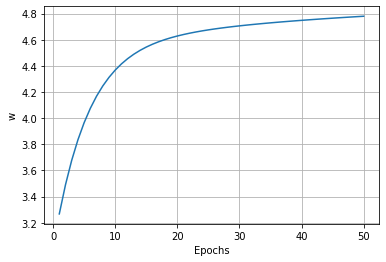

In [17]:
plt.plot(np.arange(epochs)+1, w_list)
plt.xlabel("Epochs")
plt.ylabel("w")
plt.grid()

Let's visualize how the `b` value updated with epochs.

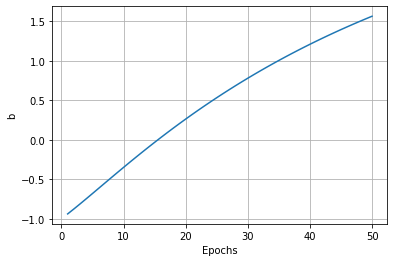

In [18]:
plt.plot(np.arange(epochs)+1, b_list)
plt.xlabel("Epochs")
plt.ylabel("b")
plt.grid()

Text(0, 0.5, 'y')

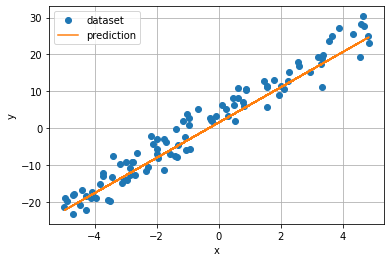

In [19]:
plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Now you can try to change initial values of `epochs`, `lr`, `w`, `b` etc. and see what happens.